**Author:** Sydney Crandall

**Last Edited:** June 1st, 2022

In [1]:
# imports
import pandas as pd
import numpy as np
import cluster
import math
import munge
import datetime as dt
from metpy.units import units
import visualizations as vis
from scipy.stats import iqr
import matplotlib.pyplot as plt
import seaborn as sb
import gapstat as gs

In [2]:
# run functions from munge.py
cas = munge.from_raw("casperRaw.csv")
cas = munge.add_season_rearrange(cas)
cas = munge.replace_month_hour(cas)
cas = munge.wet_bulb(cas)
casHourly = munge.to_hourly(cas)
casDaily = munge.to_daily(casHourly)

casHourly.to_csv("casHourly.csv")
casDaily.to_csv("casDaily.csv")

In [3]:
# run the functions from cluster.py
included_cols = ['drytemp_max', 'drytemp_min', 'dewtemp_avg','RH_max',
                 'RH_min', 'pres_max', 'pres_min', 'prec_inch',
                 'drytemp_max_hour', 'drytemp_min_hour', 'prec_max_hour']
casData, casScaledData = cluster.scale_and_convert_to_numpy(casDaily, included_cols)

#init_centroids = cluster.plus_plus(albScaledData, 4)
k = 3
casScaledCentroids, casIdx = cluster.cluster_data(k, casScaledData)

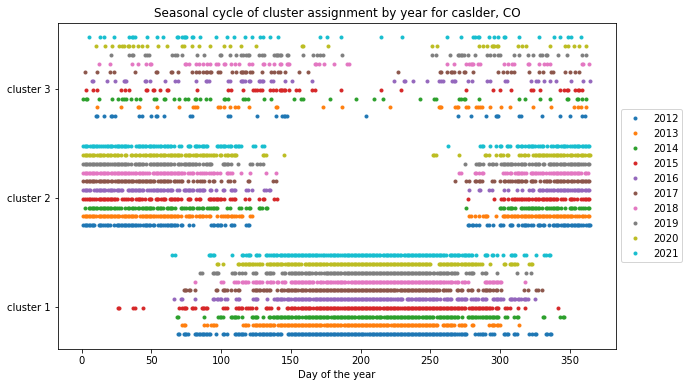

In [4]:
cluster_label_list = ["cluster 1", "cluster 2", "cluster 3", "cluster 4"]
vis.seasonal_assignment_by_year("caslder, CO", cluster_label_list[0:3], 3, casDaily, casIdx)

In [5]:
casRaw = munge.from_raw("casperRaw.csv")
casRaw.isnull().sum()

dewtemp_F      4069
drytemp_F      4030
prec_inch     38650
RH             3947
pres_mbar      4256
wetbulb_F      4397
wdir           8317
wgust_mph    102091
wspd_mph       4869
datetime          0
hour              0
month             0
dtype: int64

In [6]:
casRaw.shape

(125971, 12)

In [7]:
casDaily["cluster"] = casIdx

In [8]:
casDailyGroups = casDaily.groupby('cluster')

In [9]:
casDailyGroups.get_group(1).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.0
mean,3.046323,78.819344,45.843948,36.383324,48.944412,76.285759,18.953098,840.494202,835.478882,20.442675,1.852635,189.495651,0.005446,13.498552,5.521135,1.234511,7.110596,13.925883,-2.232774,1.0
std,0.718202,11.053659,9.222762,9.083178,6.986025,16.420845,9.297355,3.979628,4.459064,6.642684,2.845011,44.229397,0.027046,1.326210,6.876791,4.283550,8.025159,6.893517,5.083575,0.0
min,1.000000,53.000000,23.000000,11.000000,32.000000,26.000000,4.000000,828.000000,814.000000,7.000000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,1.0
25%,3.000000,70.000000,39.000000,30.000000,43.000000,65.000000,12.000000,838.000000,833.000000,15.000000,0.000000,161.000000,0.000000,13.000000,2.000000,0.000000,0.000000,13.000000,-5.000000,1.0
50%,3.000000,80.000000,47.000000,37.000000,50.000000,79.000000,17.000000,841.000000,836.000000,20.000000,0.000000,198.000000,0.000000,14.000000,3.000000,0.000000,6.000000,17.000000,-4.000000,1.0
75%,4.000000,88.000000,53.000000,43.000000,55.000000,90.000000,24.000000,843.000000,838.500000,25.000000,3.000000,225.000000,0.000000,14.000000,4.000000,0.000000,8.000000,17.000000,3.000000,1.0
max,4.000000,101.000000,70.000000,60.000000,64.000000,100.000000,63.000000,853.000000,847.500000,48.000000,16.000000,275.000000,0.475000,17.000000,23.000000,22.000000,23.000000,23.000000,16.000000,1.0


In [10]:
casDailyGroups.get_group(2).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.0
mean,1.891210,40.061958,19.515129,16.797550,25.126801,80.059074,43.068443,839.572388,833.568054,23.322407,4.664265,200.507919,0.004842,13.267291,8.007205,0.476225,8.555476,11.774496,-0.881124,2.0
std,1.166269,12.959967,11.944149,9.460735,9.715560,12.853620,15.846131,5.258074,5.705291,7.765723,4.963718,47.831631,0.018798,2.622876,8.571003,1.972452,8.519062,9.013985,6.732354,0.0
min,1.000000,-6.000000,-30.000000,-20.000000,-15.000000,28.000000,7.000000,820.000000,814.000000,7.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,2.0
25%,1.000000,32.000000,13.000000,11.000000,20.000000,72.000000,31.000000,836.000000,830.000000,17.000000,0.000000,187.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000,-6.000000,2.0
50%,1.000000,41.000000,22.000000,18.000000,27.000000,83.000000,43.000000,840.000000,834.000000,23.000000,3.000000,218.000000,0.000000,13.000000,4.000000,0.000000,7.000000,13.000000,-3.000000,2.0
75%,2.000000,50.000000,28.000000,23.000000,32.000000,89.000000,55.000000,843.000000,837.500000,29.000000,8.000000,228.250000,0.000000,14.000000,19.000000,0.000000,19.000000,21.000000,5.000000,2.0
max,4.000000,74.000000,42.000000,42.000000,43.000000,100.000000,86.000000,857.000000,849.000000,49.000000,23.000000,291.000000,0.215000,23.000000,23.000000,20.000000,23.000000,23.000000,18.000000,2.0


In [11]:
casDailyGroups.get_group(3).describe()

,tilt_season,drytemp_max,drytemp_min,dewtemp_avg,wetbulb_avg,RH_max,RH_min,pres_max,pres_min,wspd_max,wspd_min,wdir_avg,prec_inch,drytemp_max_hour,drytemp_min_hour,prec_max_hour,pres_max_hour,pres_min_hour,pres_tend,cluster
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.0
mean,2.336431,46.653347,27.624535,28.572491,33.131969,93.100372,53.273235,837.185852,829.780640,21.896841,2.686803,155.120819,0.120028,8.317844,15.236059,13.289963,14.221190,6.905204,3.968401,3.0
std,1.156397,16.401560,14.237944,12.492955,12.500850,5.258243,18.411085,5.213752,5.776348,6.711954,3.311419,61.558731,0.147145,5.914136,8.666920,6.998639,8.843422,7.265152,7.316021,0.0
min,1.000000,0.000000,-19.000000,-8.000000,-5.000000,63.500000,11.000000,820.000000,813.500000,8.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.000000,3.0
25%,1.000000,35.000000,18.000000,20.000000,25.000000,90.000000,39.000000,834.000000,826.000000,17.000000,0.000000,104.250000,0.030000,0.000000,5.000000,8.000000,6.000000,0.000000,-3.000000,3.0
50%,2.000000,44.000000,29.000000,28.000000,33.000000,93.000000,53.000000,837.000000,830.000000,21.500000,0.000000,159.000000,0.070000,11.000000,20.000000,15.000000,19.000000,5.000000,5.000000,3.0
75%,4.000000,57.000000,37.000000,37.000000,42.000000,97.000000,68.000000,841.000000,834.000000,25.000000,5.000000,208.000000,0.155000,13.000000,22.000000,19.000000,21.000000,13.000000,9.000000,3.0
max,4.000000,96.000000,67.000000,56.000000,63.000000,100.000000,93.000000,851.000000,844.000000,49.000000,15.000000,317.000000,1.200000,23.000000,23.000000,23.000000,23.000000,23.000000,21.000000,3.0
